# 2D Convolution

2D Convolution is useful for:
- Feature extraction
- Image enhancement
- Edge detection

In [6]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 1.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [76]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt

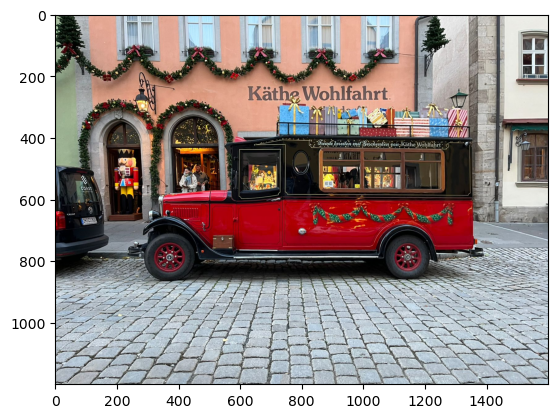

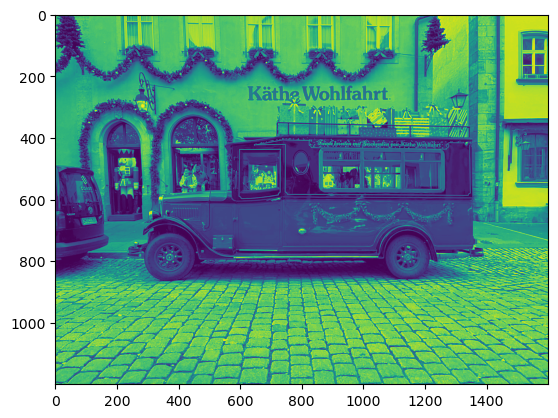

In [117]:
root = os.getcwd();
imgPath = os.path.join(root, 'rothenburg.jpeg')
image = cv.imread(imgPath)
image_color = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image_color)
plt.show()
plt.imshow(image_gray)
plt.show()

## Blur Kernel

Kernel [[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


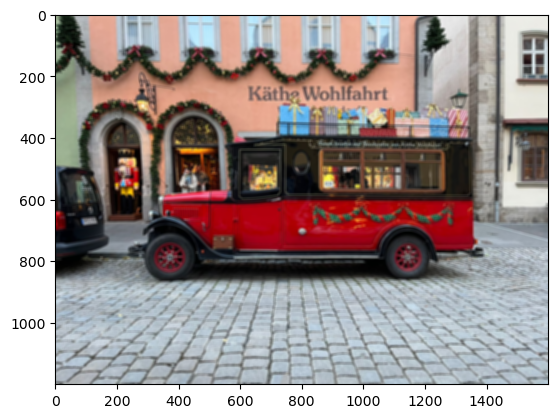

In [83]:
n = 10 # Blur Intensity
kernel = np.ones((n, n)) / (n * n)
print("Kernel", kernel)
imgFilter = cv.filter2D(image_color, -1, kernel)
plt.imshow(imgFilter)
plt.show()

## Outline Kernel
```
[-1, -1, -1]
[-1,  8, -1]
[-1, -1, -1]
```

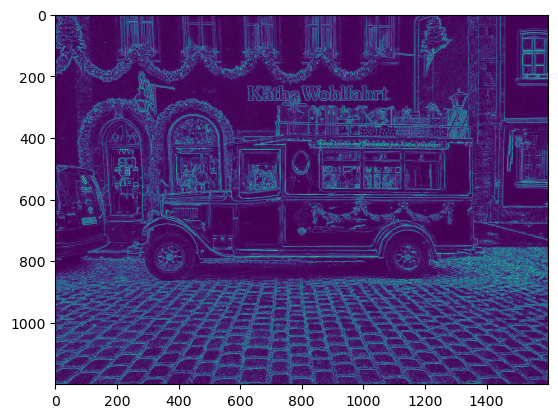

In [112]:
outline = np.array([[-1, -1, -1],
                     [-1, 8, -1],
                     [-1, -1,-1]])
imgFilter = cv.filter2D(image_gray, -1, outline)
plt.imshow(imgFilter)
plt.show()

## Sobel X Kernel
```
[-1, 0, 1]
[-2, 0, 2]
[-1, 0, 1]
```

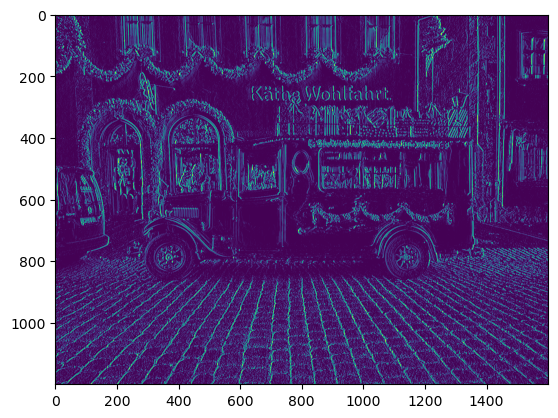

In [113]:
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

imgFilter = cv.filter2D(image_gray, -1, sobelX)
plt.imshow(imgFilter)
plt.show()

## Canny Edge Detection

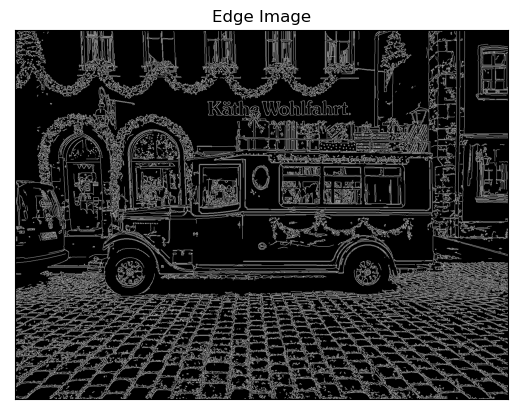

In [124]:
edges = cv.Canny(image_gray,100,200)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Harris Corner Detection

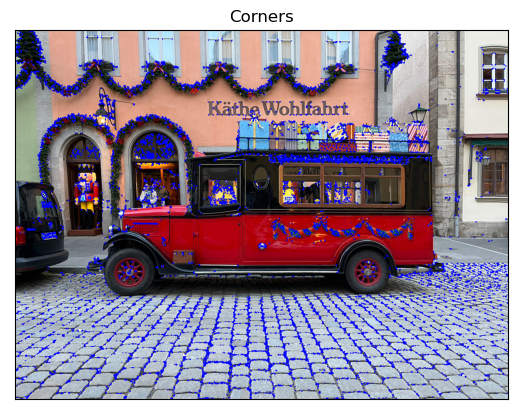

In [133]:
image_gray = np.float32(image_gray)
dst = cv.cornerHarris(image_gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
image_color[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(image_color)
plt.title('Corners'), plt.xticks([]), plt.yticks([])
plt.show()